# Flex Field Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### First look at Dataset

In [2]:
cleaned_flexfield_fitness_data = pd.read_csv('data/cleaned_flexfield_fitness.csv')
cleaned_flexfield_fitness_data.head()

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,771155,Female,24,6.2,Endurance training,4,2173.0
1,231932,Male,22,7.4,Fat loss,2,1752.0
2,465838,Female,23,6.0,Build muscle,0,2884.0
3,359178,Female,18,9.3,Build muscle,5,2559.0
4,744167,Male,23,5.7,Flexibility,1,1606.0


## Visuliaztions

### Fitness Goal vs. Hours at Gym (per week)

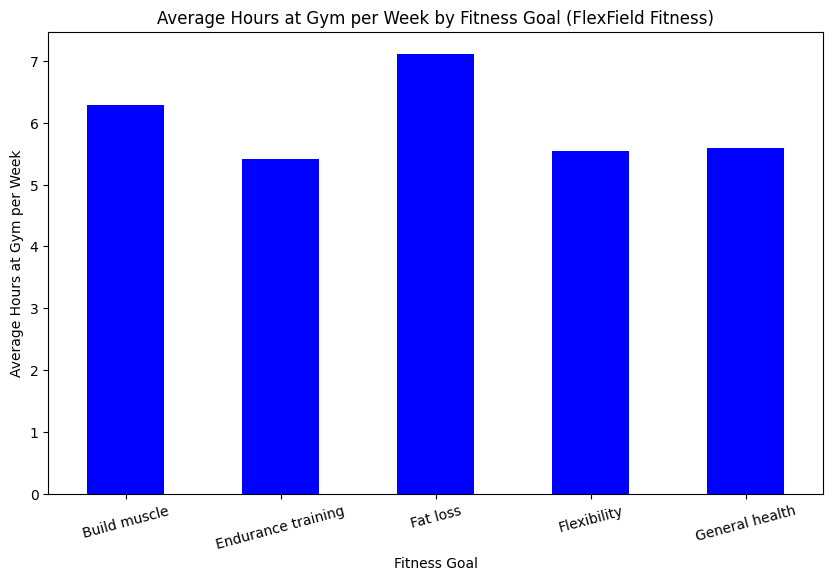

In [3]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_gym = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Hours at Gym (per week)'].mean()
flexfield_fitness_vs_gym.plot(kind='bar', color='blue')
plt.title('Average Hours at Gym per Week by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Hours at Gym per Week')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Fitness Goal vs. Gym Membership Length (years)

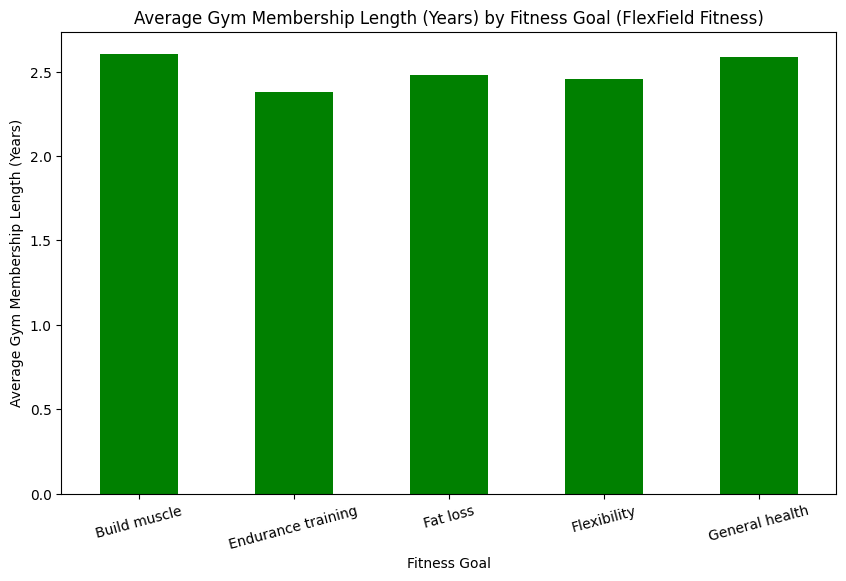

In [4]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_membership = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Gym Membership Length (years)'].mean()
flexfield_fitness_vs_membership.plot(kind='bar', color='green')
plt.title('Average Gym Membership Length (Years) by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Gym Membership Length (Years)')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Fitness Goal vs. Calorie Intake

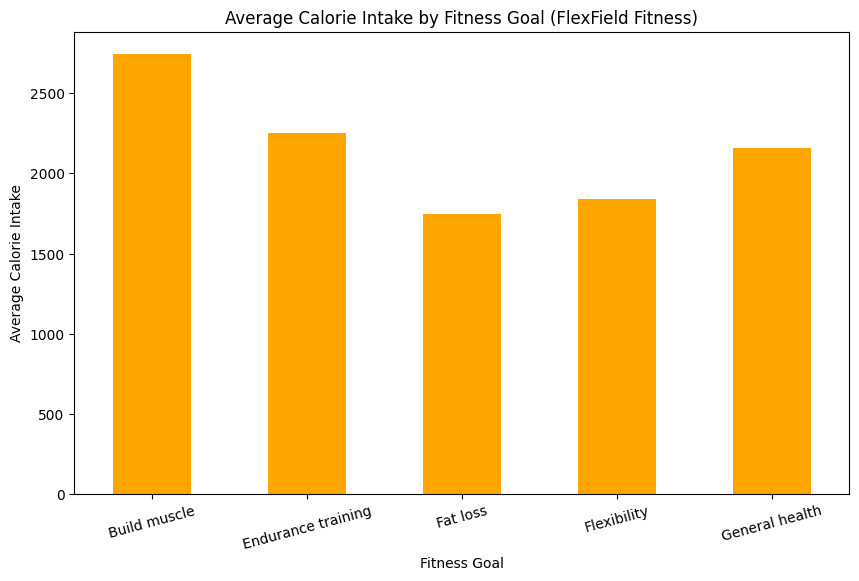

In [5]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_calorie = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Calorie Intake'].mean()
flexfield_fitness_vs_calorie.plot(kind='bar', color='orange')
plt.title('Average Calorie Intake by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Hours at Gym (per week) vs. Gym Membership Length (years)

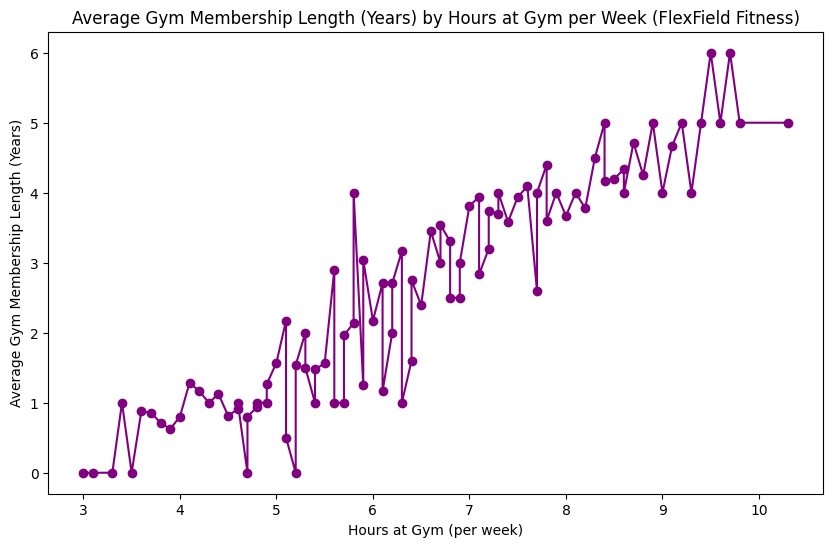

In [6]:
plt.figure(figsize=(10, 6))
flexfield_gym_vs_membership = cleaned_flexfield_fitness_data.groupby('Hours at Gym (per week)')['Gym Membership Length (years)'].mean()
flexfield_gym_vs_membership.plot(kind='line', marker='o', color='purple')
plt.title('Average Gym Membership Length (Years) by Hours at Gym per Week (FlexField Fitness)')
plt.ylabel('Average Gym Membership Length (Years)')
plt.xlabel('Hours at Gym (per week)')
plt.show()

### Hours at Gym (per week) vs. Calorie Intake

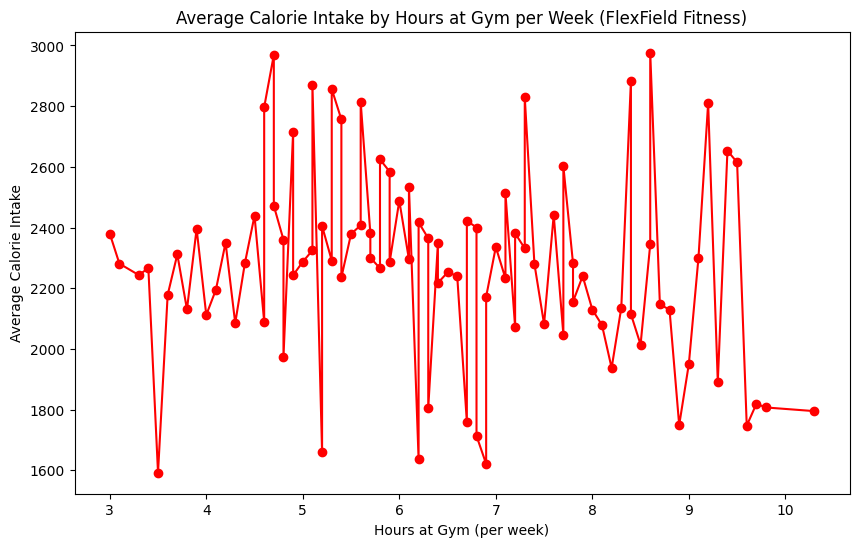

In [7]:
plt.figure(figsize=(10, 6))
flexfield_gym_vs_calorie = cleaned_flexfield_fitness_data.groupby('Hours at Gym (per week)')['Calorie Intake'].mean()
flexfield_gym_vs_calorie.plot(kind='line', marker='o', color='red')
plt.title('Average Calorie Intake by Hours at Gym per Week (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Hours at Gym (per week)')
plt.show()


### Gym Membership Length (years) vs. Calorie Intake

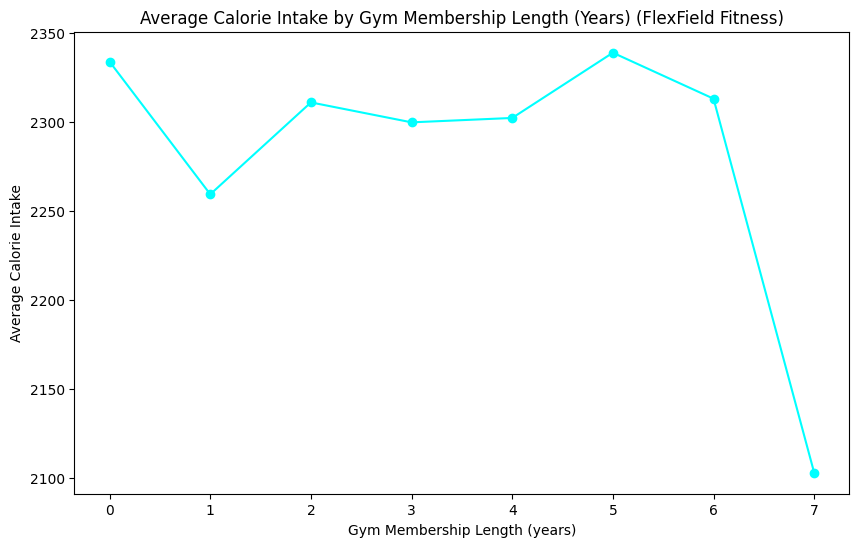

In [8]:
plt.figure(figsize=(10, 6))
flexfield_membership_vs_calorie = cleaned_flexfield_fitness_data.groupby('Gym Membership Length (years)')['Calorie Intake'].mean()
flexfield_membership_vs_calorie.plot(kind='line', marker='o', color='cyan')
plt.title('Average Calorie Intake by Gym Membership Length (Years) (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Gym Membership Length (years)')
plt.show()